# Strong Bistables

This example illustrates a particularly strong, that is, parametrically
robust bistable system. The model topology is symmetric between
molecules **b** and **c**. We have both positive feedback of molecules **b** and **c**
onto themselves, and also inhibition of **b** by **c** and vice versa. 

<img src="strongBis.png">

Open the python file to see what is happening.
The simulation starts at a symmetric point and the model settles at 
precisely the balance point where **a**, **b**, and **c** are at the same 
concentration.
At t= 100 we apply a small molecular 'tap' to push it over to a state 
where **c** is larger. This is stable.
At t = 210 we apply a moderate push to show that it is now very stably in
this state, and the system rebounds to its original levels.
At t = 320 we apply a strong push to take it over to a state where **b**
is larger. 
At t = 430 we give it a strong push to take it back to the **c** dominant
state.

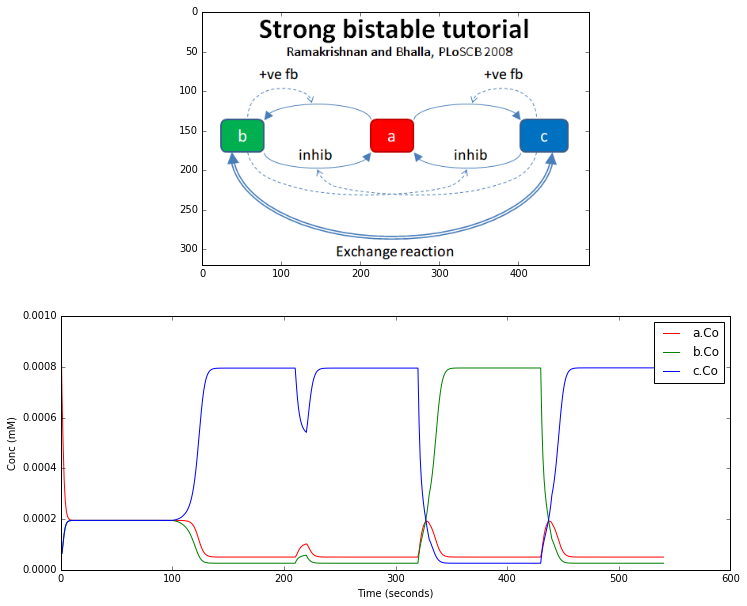

In [3]:
#########################################################################
## This program is part of 'MOOSE', the
## Messaging Object Oriented Simulation Environment.
##           Copyright (C) 2014 Upinder S. Bhalla. and NCBS
## It is made available under the terms of the
## GNU Lesser General Public License version 2.1
## See the file COPYING.LIB for the full notice.
#########################################################################

%matplotlib inline

import moose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import numpy
import sys

def main():

        solver = "gsl"  # Pick any of gsl, gssa, ee..
        #solver = "gssa"  # Pick any of gsl, gssa, ee..
        #moose.seed( 1234 ) # Needed if stochastic.
        mfile = './M1719.g'
        runtime = 100.0
        if ( len( sys.argv ) >= 2 ):
                solver = sys.argv[1]
        modelId = moose.loadModel( mfile, 'model', solver )
        # Increase volume so that the stochastic solver gssa 
        # gives an interesting output
        compt = moose.element( '/model/kinetics' )
        compt.volume = 0.2e-19 
        r = moose.element( '/model/kinetics/equil' )

        moose.reinit()
        moose.start( runtime ) 
        r.Kf *= 1.1 # small tap to break symmetry
        moose.start( runtime/10 ) 
        r.Kf = r.Kb
        moose.start( runtime ) 

        r.Kb *= 2.0 # Moderate push does not tip it back.
        moose.start( runtime/10 ) 
        r.Kb = r.Kf
        moose.start( runtime ) 

        r.Kb *= 5.0 # Strong push does tip it over
        moose.start( runtime/10 ) 
        r.Kb = r.Kf
        moose.start( runtime ) 
        r.Kf *= 5.0 # Strong push tips it back.
        moose.start( runtime/10 ) 
        r.Kf = r.Kb
        moose.start( runtime ) 


        # Display all plots.
        img = mpimg.imread( 'strongBis.png' )
        fig = plt.figure( figsize=(12, 10 ) )
        png = fig.add_subplot( 211 )
        imgplot = plt.imshow( img )
        ax = fig.add_subplot( 212 )
        x = moose.wildcardFind( '/model/#graphs/conc#/#' )
        dt = moose.element( '/clock' ).tickDt[18]
        t = numpy.arange( 0, x[0].vector.size, 1 ) * dt
        ax.plot( t, x[0].vector, 'r-', label=x[0].name )
        ax.plot( t, x[1].vector, 'g-', label=x[1].name )
        ax.plot( t, x[2].vector, 'b-', label=x[2].name )
        plt.ylabel( 'Conc (mM)' )
        plt.xlabel( 'Time (seconds)' )
        pylab.legend()
        pylab.show()

# Run the 'main' if this script is executed standalone.
if __name__ == '__main__':
        main()